<a href="https://colab.research.google.com/github/feliperromao/datascience-na-pratica/blob/main/An%C3%A1lise_de_dados_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-04-09/visualisations/listings.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,278,2020-02-14,1.90,1,152
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,200,1,339,2020-04-09,2.50,2,0
2,25428,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-02-09,0.13,2,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,1.94,1,66
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,336,2020-09-20,2.59,2,335


In [24]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

print(df.dtypes)

Entradas:	 17825
Variáveis:	 7
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [5]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.134642
last_review                       0.134642
host_name                         0.033380
name                              0.001795
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff18fa00dd0>,
      dtype=object)

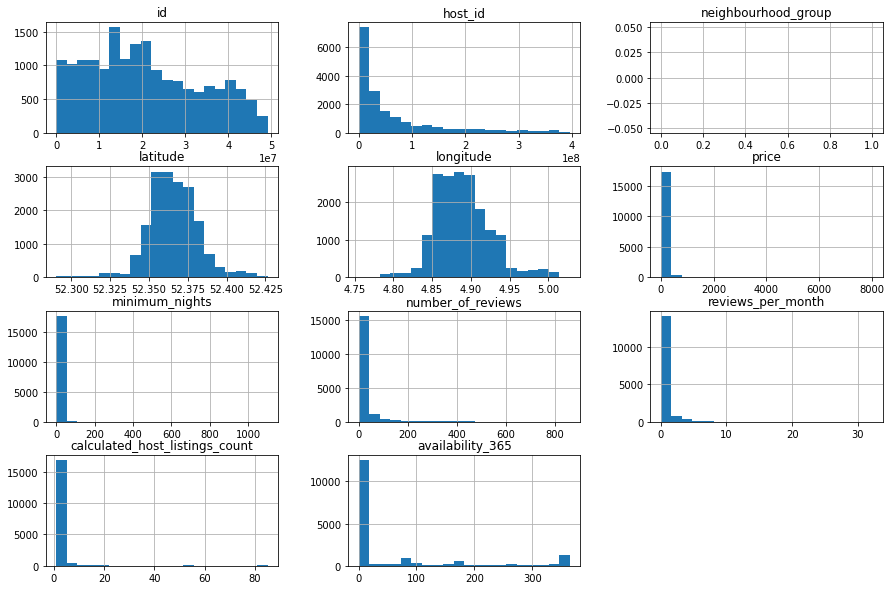

In [6]:
df.hist(bins=20, figsize=(15,10))

## Q4. Há outliers presentes?

In [30]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,17825.000000,17825.000000,17825.000000,15425.000000,17825.000000,17825.000000
mean,154.495877,3.867041,23.952875,0.562200,2.684376,61.448247
std,154.162566,18.732039,54.831150,1.017706,8.813855,114.424897
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,95.000000,2.000000,2.000000,0.120000,1.000000,0.000000
50%,129.000000,2.000000,8.000000,0.260000,1.000000,0.000000
75%,180.000000,3.000000,21.000000,0.540000,1.000000,83.000000
max,8000.000000,1100.000000,860.000000,32.190000,85.000000,365.000000


In [31]:
normalized_df = df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]

### Boxplot para `minimum_nights`

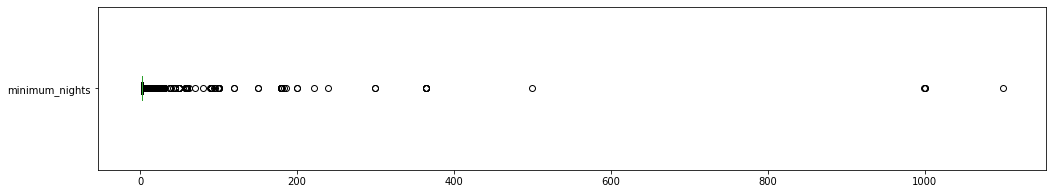

minimum_nights: valores acima de 30:
95 entradas
0.5330%


In [42]:
df.minimum_nights.plot(kind="box", vert=False, figsize=(17,3))
plt.show()


# Ver quantidade de valores acima de 30
entries_minimum_nights = len(df[df.minimum_nights > 30])
percent_minimum_nights = len(df[df.minimum_nights > 30]) / df.shape[0] * 100
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(entries_minimum_nights))
print("{:.4f}%".format(percent_minimum_nights))

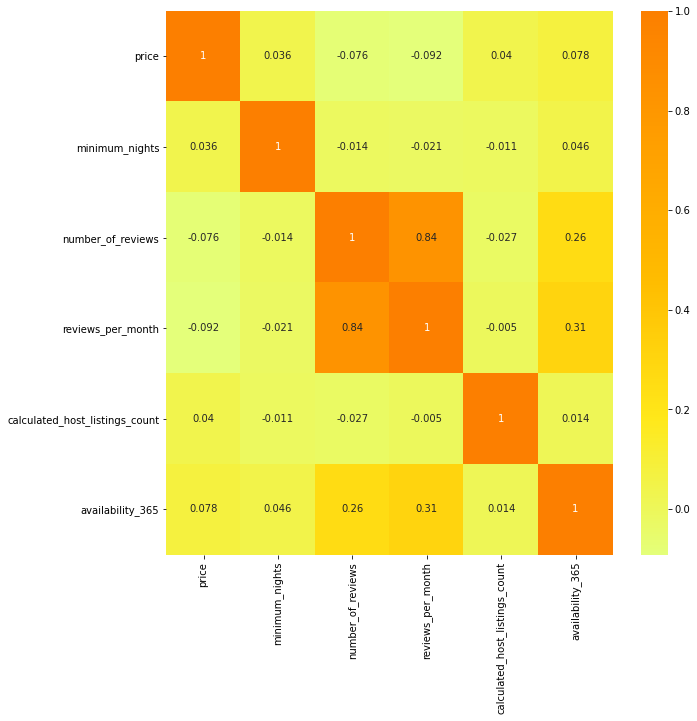

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(normalized_df.corr(), cmap="Wistia", annot=True, ax=ax)
plt.show()